<a href="https://colab.research.google.com/github/MZainalFuadz/UjianAkhirSemesterDM/blob/main/Decision_Three%2CRandom_Forest%2CLR%2CSVN%2CKNN%2CNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/MZainalFuadz/UjianAkhirSemesterDM/main/Iris.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.drop('Id', axis=1, inplace=True)

df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.shape

(150, 5)

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<Axes: ylabel='species'>

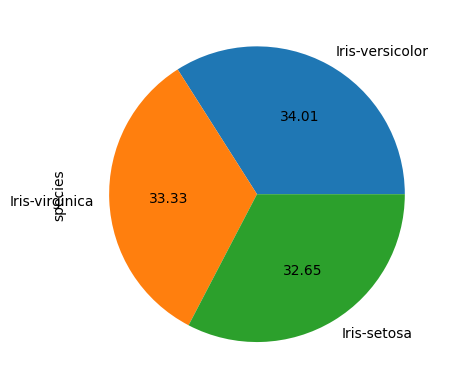

In [15]:
df['species'].value_counts().plot(kind='pie', autopct = '%.2f')

<Axes: xlabel='sepal_width', ylabel='Density'>

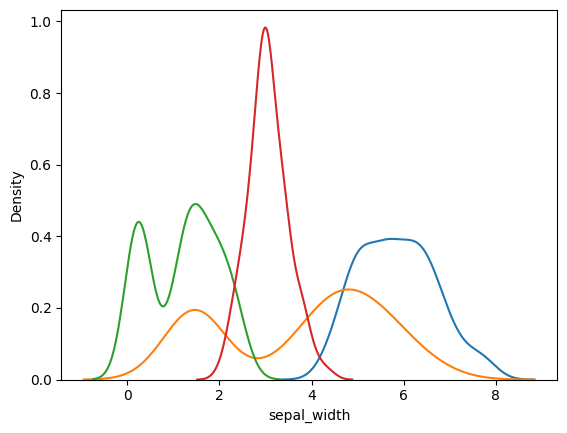

In [16]:
sns.distplot(df["sepal_length"],hist=False)
sns.distplot(df["petal_length"],hist=False)
sns.distplot(df["petal_width"],hist=False)
sns.distplot(df["sepal_width"],hist=False)

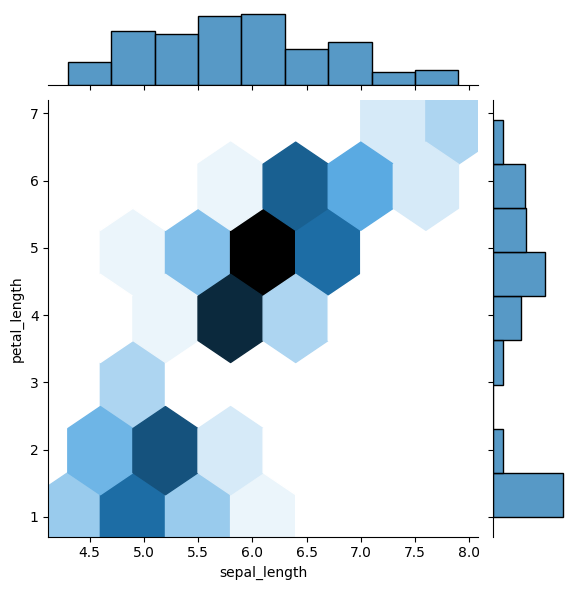

In [17]:
sns.jointplot(x=df['sepal_length'],y=df['petal_length'],data=df,kind='hex')

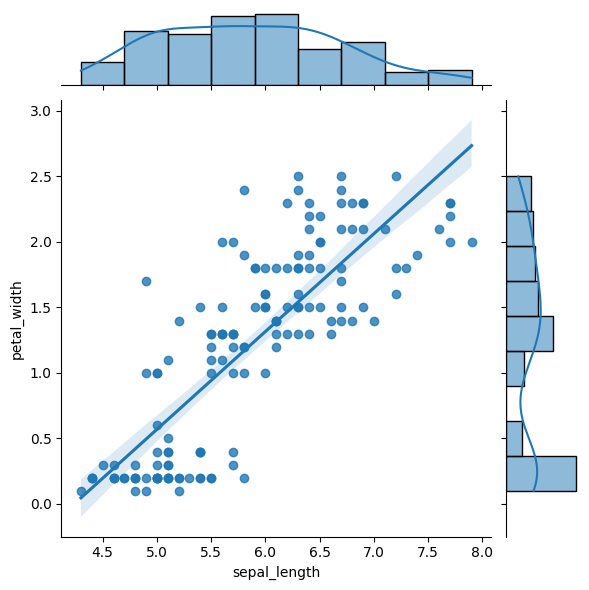

In [18]:
sns.jointplot(x='sepal_length',y='petal_width',data=df,kind='reg')

<Figure size 640x480 with 0 Axes>

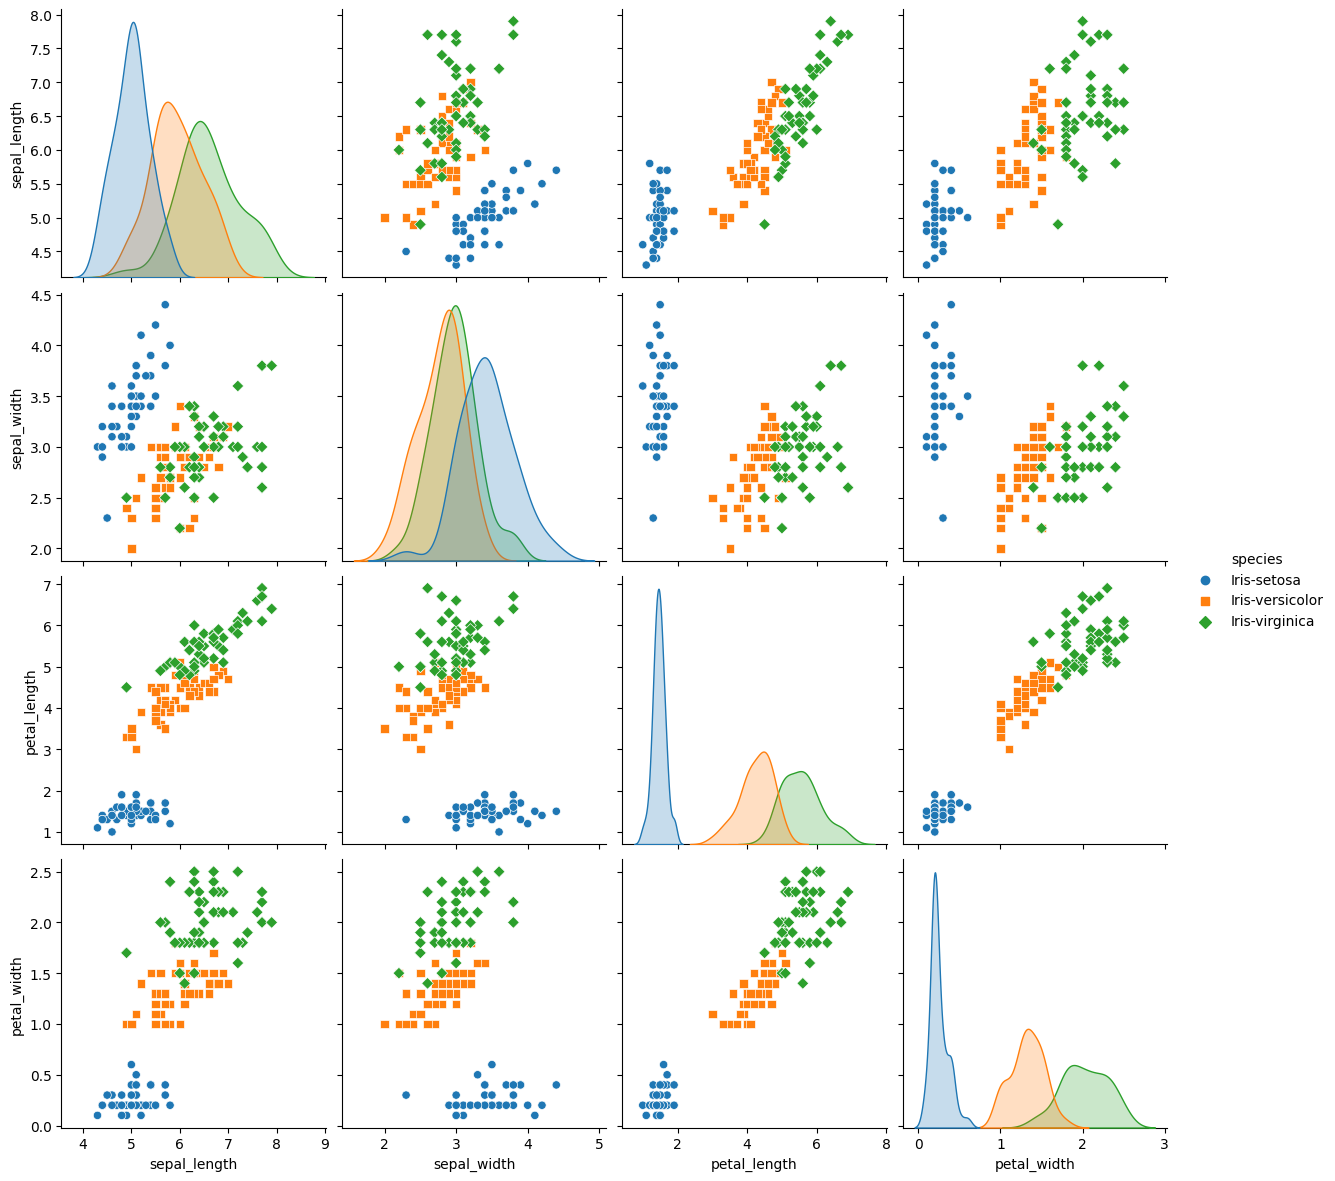

In [19]:
plt.figure()

sns.pairplot(df, hue = "species", size=3, markers=["o", "s", "D"])

<Axes: >

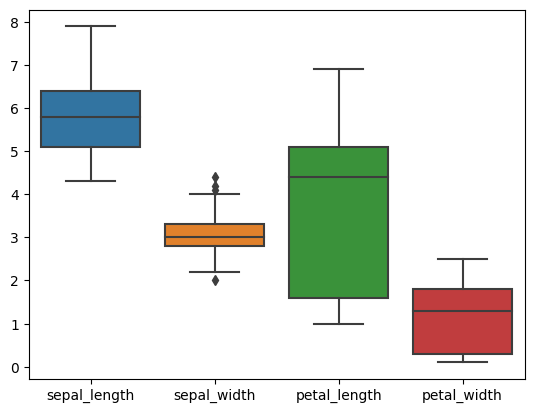

In [20]:
sns.boxplot(data=df)

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

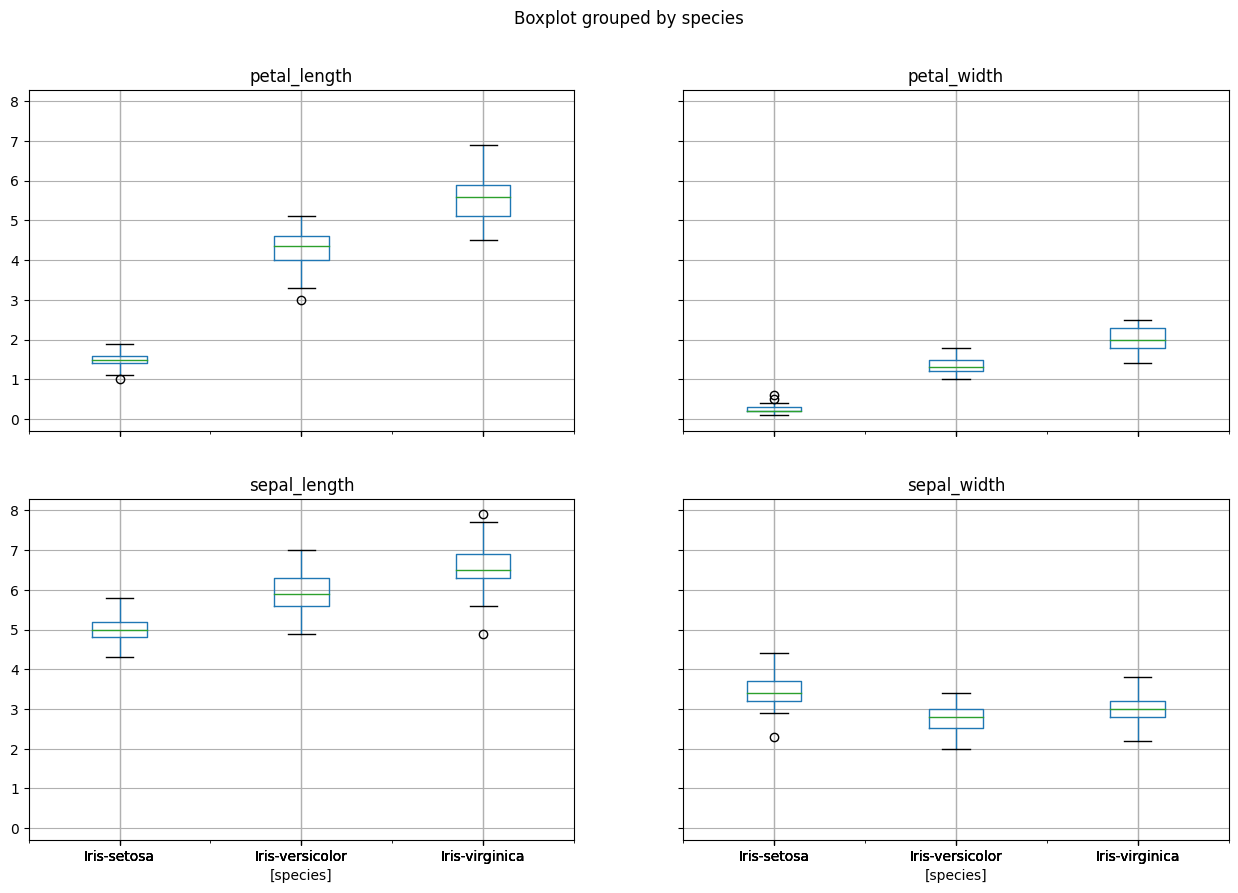

In [21]:
df.boxplot(by="species", figsize=(15, 10))

In [22]:
import plotly.express as px

fig = px.scatter_3d(df, x="sepal_length", y="petal_length", z="petal_width", color="species", color_continuous_scale="Spectral")
fig.show()

In [23]:
feature = ["sepal_length","sepal_width","petal_length","petal_width"]
X = df[feature].values
y = df['species'].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [26]:
y = le.transform(y)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [28]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Logistic Regretion

In [30]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [31]:
lr_pred = lr.predict(X_test_scaled)

In [32]:
lr_accuracy = accuracy_score(lr_pred, y_test)
lr_accuracy

0.9666666666666667

KNN (K-Nearest Neighbor)

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
knn_pred = knn.predict(X_test_scaled)

In [35]:
knn_accuracy = accuracy_score(y_test,knn_pred)

Support Vector Classification

In [36]:
svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [37]:
svc_pred = svc.predict(X_test_scaled)

In [38]:
svc_accuracy = accuracy_score(y_test,svc_pred)
svc_accuracy

0.9666666666666667

Gaussian Naive Bayes

In [39]:
nb = GaussianNB()
nb.fit(X_train_scaled,y_train)

GaussianNB()

In [40]:
nb_pred = nb.predict(X_test_scaled)

In [41]:
nb_accuracy = accuracy_score(y_test,nb_pred)
nb_accuracy

0.9666666666666667

Descision Tree

In [42]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [43]:
dt_pred = decision_tree_model.predict(X_test_scaled)

In [44]:
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_accuracy


1.0

Random Forest

In [45]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [46]:
rf_pred = random_forest_model.predict(X_test_scaled)

In [47]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy


0.9666666666666667

## Evaluasi

In [48]:
confusion_matrix(y_test, lr_pred)
print("\nLaporan Klasifikasi (Linear Regretion):\n", classification_report(y_test, lr_pred))


Laporan Klasifikasi (Linear Regretion):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [49]:
confusion_matrix(y_test, knn_pred)
print("\nLaporan Klasifikasi (KNN):\n", classification_report(y_test, knn_pred))


Laporan Klasifikasi (KNN):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [50]:
confusion_matrix(y_test, svc_pred)
print("\nLaporan Klasifikasi (SVC):\n", classification_report(y_test, svc_pred))


Laporan Klasifikasi (SVC):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [51]:
confusion_matrix(y_test, nb_pred)
print("\nLaporan Klasifikasi(GNaive Bayes):\n", classification_report(y_test, nb_pred))


Laporan Klasifikasi(GNaive Bayes):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [52]:
confusion_matrix(y_test, dt_pred)
print("\nLaporan Klasifikasi (Decision Tree):\n", classification_report(y_test, dt_pred))


Laporan Klasifikasi (Decision Tree):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [53]:
confusion_matrix(y_test, rf_pred)
print("\nLaporan Klasifikasi (Random Forest):\n", classification_report(y_test, rf_pred))


Laporan Klasifikasi (Random Forest):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [54]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','SVM', 'KNN','Naive Bayes','Decision Tree', 'Random Forest'],
    'Score': [lr_accuracy, svc_accuracy, knn_accuracy, nb_accuracy, dt_accuracy, rf_accuracy]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
1.000000,Decision Tree
0.966667,Logistic Regression
0.966667,SVM
0.966667,KNN
0.966667,Naive Bayes
0.966667,Random Forest
